In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "../log"
dataset = "osm"
indexes = ["lipp", "alex"]
time = "insert"
performances = ["best", "worst"]

# Create a dictionary to store data for each time
data_dict = {index:{} for index in indexes}

for index in indexes:
    for performance in performances:
        file_path = os.path.join(base_dir, f"{performance}", dataset, f"{index}_{time}_depth_distribution.log")
        data = pd.read_csv(file_path)
        data_dict[index][performance] = data

print("load data successfully")

load data successfully


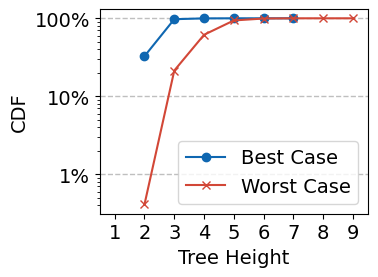

In [8]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(4, 3))
colors = {'worst': '#d24737', 'best': '#0F67B1', 'ideal': '#72923a'}
markers = {'worst': 'x', 'best': 'o'}
labels = {'worst': 'Worst Case', 'best': 'Best Case'}

index = "alex"
for performance in performances:
    data = data_dict[index][performance][1:].copy()
    key_count = data['count'].sum()
    data['count'] = data['count'].cumsum() / key_count
    ax.plot(data['depth'], data['count'], label=labels[performance], color=colors[performance], marker=markers[performance])

ax.set_xlabel('Tree Height')
ax.set_ylabel('CDF')
ax.set_xticks(range(1, 10))
ax.set_xlim(left=0.5,right=9.5)
ax.set_yscale('log', base=10)
yticks = [0.01, 0.1, 1]
yticklabels = ['1%', '10%', '100%']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('./fig/2_alex_depth_cdf.pdf', bbox_inches='tight', transparent=True)

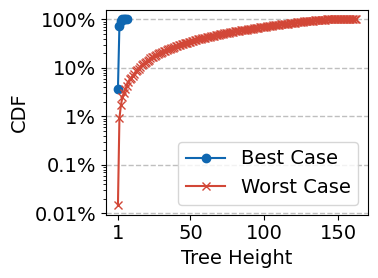

In [9]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(4, 3))
colors = {'worst': '#d24737', 'best': '#0F67B1', 'ideal': '#72923a'}
markers = {'worst': 'x', 'best': 'o'}
labels = {'worst': 'Worst Case', 'best': 'Best Case'}

index = "lipp"
lines = {}
for performance in performances:
    data = data_dict[index][performance].copy()
    key_count = data['count'].sum()
    data['count'] = data['count'].cumsum() / key_count
    line, = ax.plot(data['depth'], data['count'], label=labels[performance], color=colors[performance], marker=markers[performance])
    lines[performance] = line

ax.set_xlabel('Tree Height')
ax.set_ylabel('CDF')
ax.set_xticks([1, 50, 100, 150])
ax.set_yscale('log', base=10)
yticks = [0.0001, 0.001, 0.01, 0.1, 1]
yticklabels = ['0.01%', '0.1%', '1%', '10%', '100%']
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.yaxis.grid(which='major', linestyle='--', linewidth=1, color='gray', alpha=0.5)
ax.legend()

plt.tight_layout()
plt.show()
fig.savefig('./fig/2_lipp_depth_cdf.pdf', bbox_inches='tight', transparent=True)